In [1]:
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

from scikitplot.metrics import plot_confusion_matrix

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
droped_data = data.drop(['SibSp','Parch','Ticket','Cabin','PassengerId','Name'],axis=1)

In [6]:
droped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


In [7]:
survived_mode = droped_data['Survived'].mode()
class_mode = droped_data['Pclass'].mode()
sex_mode = droped_data['Sex'].mode()
age_mean = droped_data['Age'].mean()
fare_mean = droped_data['Fare'].mean()
embarked_mode = droped_data['Embarked'].mode()
type(survived_mode)
#print(survived_mode)

pandas.core.series.Series

In [8]:
droped_data['Survived'].fillna(survived_mode, inplace = True)

In [9]:
droped_data['Pclass'].fillna(class_mode, inplace = True)

In [10]:
droped_data['Sex'].fillna(sex_mode, inplace = True)

In [11]:
#droped_data['Age'].fillna(age_mean, inplace = True)
age_min = data['Age'].min()
age_max = data['Age'].max()
droped_data['Age'] = droped_data['Fare'].apply(lambda x: ((x-age_min)/(age_max-age_min)))

In [12]:
#droped_data['Fare'].fillna(fare_mean, inplace = True)
fare_min = data['Fare'].min()
fare_max = data['Fare'].max()
droped_data['Fare'] = droped_data['Fare'].apply(lambda x:((x - fare_min)/(fare_max- fare_min)))

In [13]:
droped_data['Embarked'].fillna(embarked_mode, inplace = True)


In [14]:
droped_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    2
dtype: int64

In [15]:
droped_data[droped_data['Embarked'].isnull() == True]

,Survived,Pclass,Sex,Age,Fare,Embarked
61,1,1,female,1.0,0.15615,NaN
829,1,1,female,1.0,0.15615,NaN


In [16]:
droped_data['Embarked'].mode(dropna = True)

0    S
dtype: object

In [17]:
droped_data['Embarked'].fillna('S', inplace = True)

In [18]:
droped_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [19]:
embarked_split = pd.get_dummies(droped_data['Embarked'], dtype=bool)
sex_split = pd.get_dummies(droped_data['Sex'], dtype=bool)

In [20]:
df =pd.concat([droped_data[['Pclass','Age','Fare','Survived']],
           embarked_split, sex_split],axis =1)

In [21]:
trainX, testX, trainY, testY = train_test_split(df.drop(columns=['Survived']),
                                               df['Survived'],
                                                test_size = 0.3
                                               )

In [22]:
trainX.shape

(623, 8)

In [23]:
testX.shape

(268, 8)

In [24]:
trainY.shape

(623,)

In [25]:
testY.shape

(268,)

In [26]:
model = MLPClassifier(solver='sgd',activation='logistic',max_iter=5000000, hidden_layer_sizes=(400))

In [27]:
trained_model = model.fit(trainX,trainY)

In [28]:
model_prediction = trained_model.predict(testX)

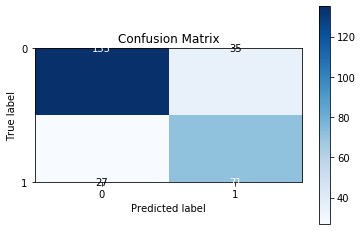

In [29]:
plot_confusion_matrix(y_true = testY, y_pred = model_prediction)

############################accuracy = 0.705223881  
50 = 0.7798507462686567  
60 = 0.77611

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(testY,model_prediction)

0.7686567164179104

In [32]:
accuracy_score(testY,model_prediction, normalize=False)

206